# E-tivity 3: Clustering and Manifold Learning

Student Name: Sean McNamara

Student ID: 20329733

### Import Python Modules

This notebook demonstrates:
the k-Means clustering algorithmthe use of manifold-learning techniques to project a clustered dataset into a 2D space and visualise it as a scatterplot

It is assumed that the input dataset contains only numerical attributes. To use this code with a dataset that contains categorical attributes, they first need to be somehow transformed to numerical. 

How categorical attributes can be represented as numerical may depend on the nature of the dataset.When you go through this notebook for the first time you may skip section C and go back to it at the end.

(1) - Apply a clustering algorithm for partitioning a data set into clusters of similar examples.

(2) - Use a manifold-learning technique to visualise a clustered data set with 3 or more numerical attributes as a 2D scatter plot.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import cluster
from sklearn import preprocessing

Load the Data

In [4]:
df = pd.read_csv("./loans_train_prepared.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


### B. Rescale the Data

Here we rescale the values in each column to the interval [0,1] with MinMaxScaler. Please note that if your dataset is already prepared for ML there is no need to rescale it again. 

See https://scikit-learn.org/stable/modules/preprocessing.html for alternative rescaling techniques. In your work on this exercise experiment with other rescaling techniques to see if they lead to a more insightful clustering.

In [5]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

### C. Scatterplot Function (to be used below for visualising a clustering)

In [6]:
colors = np.array(['orange', 'blue', 'lime', 'purple', 'pink', 'green', 'khaki'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### D. K-Means Clustering

I chose to pick 3 k means as not to over complicate the data and to get result to be easy to identify. 
3 K-means, seems to be the magic number to go for, since doing this assignment. 
When I have to use this method again I will take 3 into consideration almost as a rule of thumb. 

In [7]:
k = 3

Run k-Means

See https://scikit-learn.org/stable/modules/clustering.html for alternative clustering methods.

In [8]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

### E. Apply a manifold-learning technique to project the data set to a 2D space

https://scikit-learn.org/stable/modules/manifold.html

 Append the cluster centers to the dataset.

In [9]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

### E1. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

Project both the data and the k-Means cluster centers to 2D

In [10]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

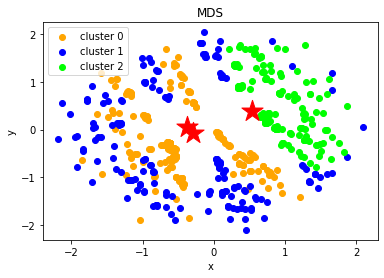

In [11]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

Multidimensional scaling (MDS) is a means of visualizing the level of similarity of individual cases of a dataset. MDS is used to translate information about the pairwise 

MDS arranges the points on the plot so that the distances among each pair of points correlates as best as possible to the dissimilarity between those two samples. The values on the two axes tell you nothing about the variables for a given sample – the plot is just a two dimensional space to arrange the points.

### E2. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

Project both the data and the k-Means cluster centers to 2D

In [12]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


 Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

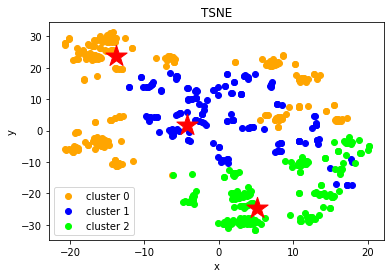

In [15]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

t-distributed stochastic neighbor embedding (t-SNE) is a statistical method for visualizing high-dimensional data by giving each datapoint a location in a two or three-dimensional map.

t-SNE's strength lies in creating tight clusters for visualization. Often we care more about relative positioning than absolute differences, in which case non-metric is preferred to metric MDS. 

It's the algorithm used for exploring high-dimensional data. It maps multi-dimensional data to two or more dimensions suitable for human observation

### F. Cluster Analysis

Add the cluster labels as an extra column in the original dataframe

In [16]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [17]:
df.head()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0    0.000000         1.084523    1.058140              0.75               1   
1    0.333333         0.925883    1.047319              0.75               1   
2    0.000000         0.683858    0.635920              0.75               1   
3    0.000000         0.608992    1.002824              0.75               1   
4    0.000000         1.101869    1.115650              0.75               1   

   Gender_Male  Gender_nan  Married_Yes  Married_nan  Self_Employed_Yes  \
0            1           0            0            0                  0   
1            1           0            1            0                  0   
2            1           0            1            0                  1   
3            1           0            1            0                  0   
4            1           0            0            0                  0   

   Self_Employed_nan  Education_Not Graduate  Property_Area_Semiurban  \
0                  0                       0                        0   
1                  0                       0                        0   
2                  0                       0                        0   
3                  0                       1                        0   
4                  0                       0                        0   

   Property_Area_Urban  Loan_Status_Y  TotalIncome  cluster  
0                    1              1     0.841086        0  
1                    0              0     0.871711        1  
2                    1              1     0.385189        0  
3                    1              1     0.717012        0  
4                    1              1     0.860305        0

In [18]:
df.tail()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
609    0.000000         0.666409    0.676143             0.750   
610    1.000000         0.858916    0.395858             0.375   
611    0.333333         1.313719    1.566110             0.750   
612    0.666667         1.267616    1.325676             0.750   
613    0.000000         0.925883    1.074155             0.750   

     Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
609               1            0           0            0            0   
610               1            1           0            1            0   
611               1            1           0            1            0   
612               1            1           0            1            0   
613               0            0           0            0            0   

     Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
609                  0                  0                       0   
610                  0                  0                       0   
611                  0                  0                       0   
612                  0                  0                       0   
613                  1                  0                       0   

     Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  TotalIncome  \
609                        0                    0              1     0.364708   
610                        0                    0              1     0.587496   
611                        0                    1              1     1.116075   
612                        0                    1              1     1.042256   
613                        1                    0              0     0.663523   

     cluster  
609        0  
610        0  
611        0  
612        0  
613        1

### Compute the median value of each attribute for each cluster

Median is determined by ranking the data from largest to smallest, and then identifying the middle so that there are an equal number of data values larger and smaller than it is... Under these circumstances, median gives a better representation of central tendency than average.

In [19]:
df.median()

Dependents                 0.000000
ApplicantIncome            0.815365
LoanAmount                 1.047319
Loan_Amount_Term           0.750000
Credit_History             1.000000
Gender_Male                1.000000
Gender_nan                 0.000000
Married_Yes                1.000000
Married_nan                0.000000
Self_Employed_Yes          0.000000
Self_Employed_nan          0.000000
Education_Not Graduate     0.000000
Property_Area_Semiurban    0.000000
Property_Area_Urban        0.000000
Loan_Status_Y              1.000000
TotalIncome                0.783902
cluster                    1.000000
dtype: float64

From an observation from the above it is interesting to see that "LoanAmount" is higher than "ApplicantIncome" & "TotalIncome" 

### Compute the mean value of each attribute for each cluster

In [20]:
df.groupby('cluster').mean()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
cluster                                                              
0          0.260631         0.922071    1.070226          0.701646   
1          0.230337         0.897784    1.078417          0.717416   
2          0.248705         0.927029    1.081748          0.724352   

         Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
cluster                                                                      
0              0.987654     0.847737    0.016461     0.674897     0.004115   
1              0.539326     0.764045    0.028090     0.556180     0.000000   
2              0.979275     0.761658    0.020725     0.699482     0.010363   

         Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
cluster                                                                 
0                 0.127572           0.061728                0.193416   
1                 0.134831           0.044944                0.275281   
2                 0.139896           0.046632                0.196891   

         Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  \
cluster                                                                
0                       0.000000             0.547325       1.000000   
1                       0.224719             0.387640       0.000000   
2                       1.000000             0.000000       0.927461   

         TotalIncome  
cluster               
0           0.869608  
1           0.839761  
2           0.875113

### Conclusion

By looking at the table above (mean) we can argue that:

*Cluster 2 has the highest in "ApplicantIncome" & second in"Credit_History. The same for value in "Gender_nan & "Education_Not_Graduate". 
This may indicate that cluster 2 might be focused around slightly above middle age bracket. The "Property_Area_Urban" is 0.00, and "TotalIncome" is the highest out of the 3 clusters. 

*Cluster 1 is the lowest in "ApplicanIncome" including "Married_Yes" & "Married_nan" - This route cause/tred could be from the high number for "Education_Not Graduate". Which then would cause the "Loan_Status_Y" to be at 0.00 including having the lowest "Credit_History" 
Certain factors with education and income would be a strong factor as to why the applicants loans to be approved are low (0.0). 



*Cluster 0 Is very interesting as it seems to have the second highest "ApplicantIncome" including the  highest in "Gender_Male" applicants. 
From looking at "Property_Area_Urban" (0.54) with the "Loan_Status_Y" (1.00) it seems that the applicants could be young who have money and are looking inside the urban area to invest in a potential home. 


### Elbow Criterion Method:

Additional work as an experiment below - Why I did this was to incorporate the Elbow method to see a visual example, this would help me identify the optimal number.

The idea behind elbow method is to run k-means clustering on a given dataset for a range of values of k (num_clusters, e.g k=1 to 10), and for each value of k, calculate sum of squared errors (SSE).

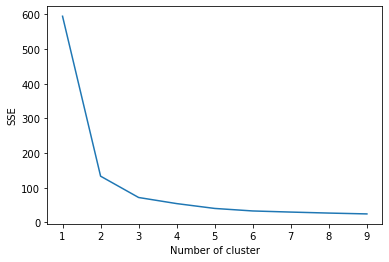

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris['feature_names'])
#print(X)
data = X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

We can see in the plot above, 3 is the optimal number of clusters, which is indeed correct.

So the goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

Here, we want to minimize SSE. SSE tends to decrease toward 0 as we increase k (and SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster).


So the goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

_Done_

Thank you for taking the time to go through my assignment. 